In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
pd.set_option('display.max_columns', 300)

In [2]:
df = pd.read_csv("~/Tuple Technologies/Transaction Data.csv",encoding = "big5hkscs",index_col=False)
df.head()

,Document No,Purchase Date,Quantity,Net Price,Customer ID
0,13354517,00:00.0,1.0,1060000.0,1096771
1,13354517,00:00.0,2.0,1060000.0,1096771
2,13393126,00:00.0,3.0,1060000.0,1096771
3,12714963,00:00.0,500.0,8300.0,1102459
4,12720899,00:00.0,200.0,217.8,1102459


In [3]:
df.describe()

,Document No,Quantity,Net Price,Customer ID
count,8.429600e+04,84296.000000,8.429600e+04,8.429600e+04
mean,1.318077e+07,11498.014576,2.476536e+05,1.099187e+06
std,8.389360e+05,27456.422326,1.642067e+07,2.333688e+04
min,1.252479e+07,-29000.000000,0.000000e+00,1.001871e+06
25%,1.281222e+07,500.000000,4.860000e+02,1.096801e+06
50%,1.308613e+07,2800.000000,6.460000e+02,1.097282e+06
75%,1.331700e+07,10000.000000,2.107750e+03,1.109282e+06
max,1.914171e+07,600000.000000,3.986675e+09,1.166404e+06


Analysing Date Column

In [4]:
print(df['Purchase Date'].value_counts())
# There is no date mention in the data. Removing the date column
df = df.drop(['Purchase Date'], axis = 1) 

00:00.0          84295
10/05/16 0:00        1
Name: Purchase Date, dtype: int64


In [5]:
df.isnull().sum()
#No null values

Document No    0
Quantity       0
Net Price      0
Customer ID    0
dtype: int64

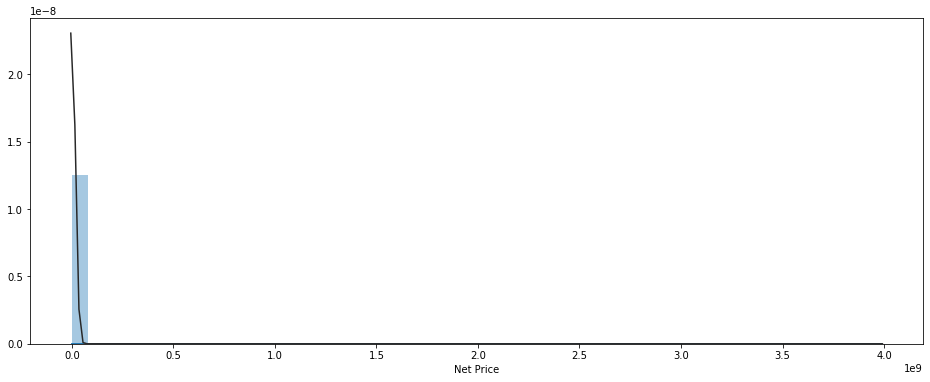

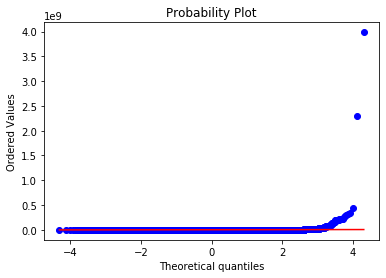

In [6]:
#histogram and normal probability plot
plt.figure(figsize=(16, 6))
sns.distplot(df['Net Price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Net Price'], plot=plt)


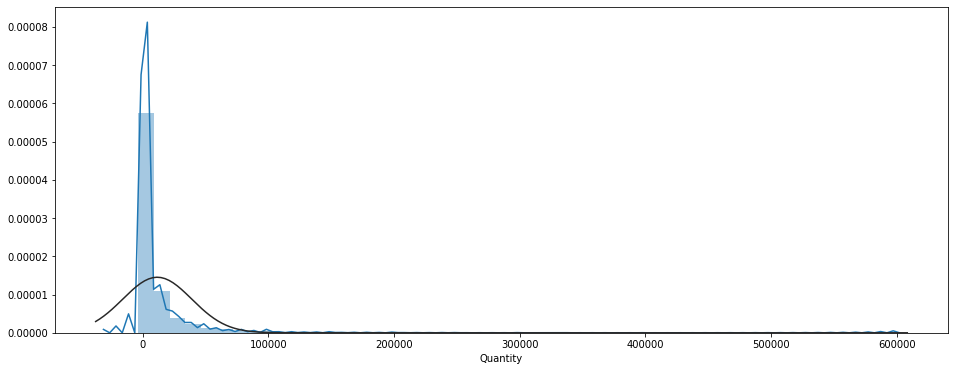

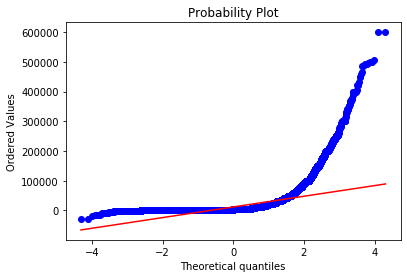

In [7]:
#histogram and normal probability plot
plt.figure(figsize=(16, 6))
sns.distplot(df['Quantity'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Quantity'], plot=plt)

In [8]:
# Analysing Customers and plotting top 10 customers

1109282    21916
1096801    10839
1097282    10476
1112058     4058
1096780     3272
1096802     3056
1116495     2239
1112236     1189
1107239     1064
1147682      811
1046103      678
1045800      666
1061111      640
1126501      626
1129250      625
1046690      594
1058163      565
1126242      507
1106190      445
1050057      380
1058031      360
1046093      334
1049174      312
1088974      287
1052901      277
1047601      272
1078039      270
1046656      270
1101461      259
1048350      259
           ...  
1128903        1
1166105        1
1155988        1
1111934        1
1124420        1
1162262        1
1158740        1
1114684        1
1104135        1
1143607        1
1164898        1
1139701        1
1053787        1
1068688        1
1162926        1
1161261        1
1086344        1
1064157        1
1152296        1
1093583        1
1112323        1
1128508        1
1129020        1
1063516        1
1143413        1
1143733        1
1117178        1
1125630       

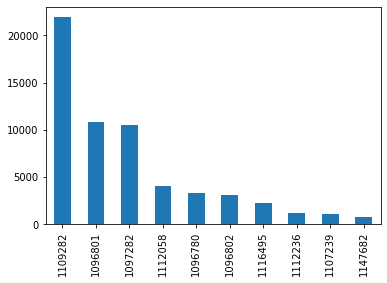

In [9]:
print(df['Customer ID'].value_counts())
df['Customer ID'].value_counts()[:10].plot(kind='bar')

In [10]:
#Calulate total purchase
df['Total Purchase'] = df['Quantity'] * df['Net Price']
df.head()

,Document No,Quantity,Net Price,Customer ID,Total Purchase
0,13354517,1.0,1060000.0,1096771,1060000.0
1,13354517,2.0,1060000.0,1096771,2120000.0
2,13393126,3.0,1060000.0,1096771,3180000.0
3,12714963,500.0,8300.0,1102459,4150000.0
4,12720899,200.0,217.8,1102459,43560.0


In [11]:
df_group=df.groupby('Customer ID').agg({'Document No': lambda x: len(x),
                                        'Quantity': lambda x: x.sum(),
                                        'Total Purchase': lambda x: x.sum()})
df_group.head()

,Document No,Quantity,Total Purchase
Customer ID,,,
1001871,2,2000.0,5.211000e+07
1001877,57,37315.0,4.117026e+08
1010699,98,39905.0,6.794535e+09
1010728,87,60444.0,2.273677e+09
1016410,82,66860.0,3.252444e+08


#  CLTV = (Customer Value/Churn Rate) x Profit margin.
 
 Customer Value = Average Order Value * Purchase Frequency


Calculate Average Order Value

In [12]:
df_group['avg_order_value']=df_group['Total Purchase']/df_group['Document No']
df_group.head()

,Document No,Quantity,Total Purchase,avg_order_value
Customer ID,,,,
1001871,2,2000.0,5.211000e+07,2.605500e+07
1001877,57,37315.0,4.117026e+08,7.222853e+06
1010699,98,39905.0,6.794535e+09,6.933199e+07
1010728,87,60444.0,2.273677e+09,2.613422e+07
1016410,82,66860.0,3.252444e+08,3.966395e+06


Calculate Purchase Frequency


In [13]:
purchase_frequency=sum(df_group['Document No'])/df_group.shape[0]

Calculate Repeat Rate and Churn Rate

In [14]:
repeat_rate=df_group[df_group['Document No'] > 1].shape[0]/df_group.shape[0]
churn_rate=1-repeat_rate
purchase_frequency,repeat_rate,churn_rate

(81.68217054263566, 0.7868217054263565, 0.21317829457364346)

Calculating Profit Margin assuming 5% profit on the total sale.

In [15]:
df_group['profit_margin']=df_group['Total Purchase']*0.05
df_group.head()

,Document No,Quantity,Total Purchase,avg_order_value,profit_margin
Customer ID,,,,,
1001871,2,2000.0,5.211000e+07,2.605500e+07,2.605500e+06
1001877,57,37315.0,4.117026e+08,7.222853e+06,2.058513e+07
1010699,98,39905.0,6.794535e+09,6.933199e+07,3.397268e+08
1010728,87,60444.0,2.273677e+09,2.613422e+07,1.136839e+08
1016410,82,66860.0,3.252444e+08,3.966395e+06,1.626222e+07


Calcualte Customer Lifetime Value

In [16]:
df_group['cust_value']=(df_group['avg_order_value']*purchase_frequency)/churn_rate

In [17]:
df_group['cust_lifetime_value']=df_group['cust_value']*df_group['profit_margin']
df_group.head()

,Document No,Quantity,Total Purchase,avg_order_value,profit_margin,cust_value,cust_lifetime_value
Customer ID,,,,,,,
1001871,2,2000.0,5.211000e+07,2.605500e+07,2.605500e+06,9.983329e+09,2.601156e+16
1001877,57,37315.0,4.117026e+08,7.222853e+06,2.058513e+07,2.767535e+09,5.697007e+16
1010699,98,39905.0,6.794535e+09,6.933199e+07,3.397268e+08,2.656550e+10,9.025011e+18
1010728,87,60444.0,2.273677e+09,2.613422e+07,1.136839e+08,1.001368e+10,1.138394e+18
1016410,82,66860.0,3.252444e+08,3.966395e+06,1.626222e+07,1.519778e+09,2.471497e+16


# Prediction Model for CLV

In [18]:
print(df.head())
df['Document No'].describe()

   Document No  Quantity  Net Price  Customer ID  Total Purchase
0     13354517       1.0  1060000.0      1096771       1060000.0
1     13354517       2.0  1060000.0      1096771       2120000.0
2     13393126       3.0  1060000.0      1096771       3180000.0
3     12714963     500.0     8300.0      1102459       4150000.0
4     12720899     200.0      217.8      1102459         43560.0


count    8.429600e+04
mean     1.318077e+07
std      8.389360e+05
min      1.252479e+07
25%      1.281222e+07
50%      1.308613e+07
75%      1.331700e+07
max      1.914171e+07
Name: Document No, dtype: float64

As there is No Date column, we can create epoch using 'Document No' as the time scale and segement the dataframe on basis of 20 equal intervals

In [19]:
interval = list(np.linspace(12524700,19141800,20).astype(int))
interval

[12524700,
 12872968,
 13221236,
 13569505,
 13917773,
 14266042,
 14614310,
 14962578,
 15310847,
 15659115,
 16007384,
 16355652,
 16703921,
 17052189,
 17400457,
 17748726,
 18096994,
 18445263,
 18793531,
 19141800]

1     26549
2     26727
3     28611
14     1670
19      739
Name: Epoch, dtype: int64


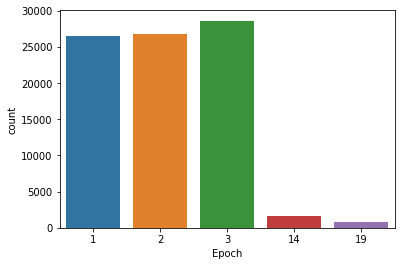

In [20]:
# Convert target variable to categorical like low,medium,high price and analyse
df['Epoch'] = 0
df.loc[df['Document No'] <= interval[0],'Epoch'] = 0
df.loc[(df['Document No'] > interval[0]) & (df['Document No'] <=interval[1]),'Epoch'] = 1
df.loc[(df['Document No'] > interval[1]) & (df['Document No'] <=interval[2]),'Epoch'] = 2
df.loc[(df['Document No'] > interval[2]) & (df['Document No'] <=interval[3]),'Epoch'] = 3
df.loc[(df['Document No'] > interval[3]) & (df['Document No'] <=interval[4]),'Epoch'] = 4
df.loc[(df['Document No'] > interval[4]) & (df['Document No'] <=interval[5]),'Epoch'] = 5
df.loc[(df['Document No'] > interval[5]) & (df['Document No'] <=interval[6]),'Epoch'] = 6
df.loc[(df['Document No'] > interval[6]) & (df['Document No'] <=interval[7]),'Epoch'] = 7
df.loc[(df['Document No'] > interval[7]) & (df['Document No'] <=interval[8]),'Epoch'] = 8
df.loc[(df['Document No'] > interval[8]) & (df['Document No'] <=interval[9]),'Epoch'] = 9
df.loc[(df['Document No'] > interval[9]) & (df['Document No'] <=interval[10]),'Epoch'] = 10
df.loc[(df['Document No'] > interval[10]) & (df['Document No'] <=interval[11]),'Epoch'] = 11
df.loc[(df['Document No'] > interval[11]) & (df['Document No'] <=interval[12]),'Epoch'] = 12
df.loc[(df['Document No'] > interval[12]) & (df['Document No'] <=interval[13]),'Epoch'] = 13
df.loc[(df['Document No'] > interval[13]) & (df['Document No'] <=interval[14]),'Epoch'] = 14
df.loc[(df['Document No'] > interval[14]) & (df['Document No'] <=interval[15]),'Epoch'] = 15
df.loc[(df['Document No'] > interval[15]) & (df['Document No'] <=interval[16]),'Epoch'] = 16
df.loc[(df['Document No'] > interval[16]) & (df['Document No'] <=interval[17]),'Epoch'] = 17
df.loc[(df['Document No'] > interval[17]) & (df['Document No'] <=interval[18]),'Epoch'] = 18
df.loc[(df['Document No'] > interval[18]) & (df['Document No'] <=interval[19]),'Epoch'] = 19
df.loc[df['Document No']> interval[19],'Epoch'] = 20
print(df['Epoch'].value_counts().sort_index())
sns.countplot('Epoch',data=df)
plt.show()

In [21]:
sale=df.pivot_table(index=['Customer ID'],columns=['Epoch'],values='Total Purchase',aggfunc='sum',fill_value=0).reset_index()
sale.head()

Epoch,Customer ID,1,2,3,14,19
0,1001871,0.000000e+00,0.0,5.211000e+07,0,0.0
1,1001877,3.285200e+05,18344600.0,3.930295e+08,0,0.0
2,1010699,5.819846e+09,133440500.0,8.412497e+08,0,-999.4
3,1010728,1.210000e+04,294500825.0,1.979164e+09,0,0.0
4,1016410,1.051648e+07,313877100.0,8.508000e+05,0,0.0


In [22]:
#summing epoch sales
sale['CLV']=sale.iloc[:,2:].sum(axis=1)
sale.head()

Epoch,Customer ID,1,2,3,14,19,CLV
0,1001871,0.000000e+00,0.0,5.211000e+07,0,0.0,5.211000e+07
1,1001877,3.285200e+05,18344600.0,3.930295e+08,0,0.0,4.113741e+08
2,1010699,5.819846e+09,133440500.0,8.412497e+08,0,-999.4,9.746892e+08
3,1010728,1.210000e+04,294500825.0,1.979164e+09,0,0.0,2.273665e+09
4,1016410,1.051648e+07,313877100.0,8.508000e+05,0,0.0,3.147279e+08


In [23]:
#Selecting Feature
X=sale[[1,2, 3,14,19]]
y=sale[['CLV']]

In [24]:
#split training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#predictions against the testing data
y_pred = lr.predict(X_test)

In [27]:
# intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

[-1.43051147e-06]
[[-1.74208867e-19  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00]]


In [28]:
#R-Square
print("R-Square:",metrics.r2_score(y_test, y_pred))


R-Square: 1.0


In [29]:
#Root Mean Square Errror
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 6.127699541101803e-05
